In [46]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

### Systemmatrix für Vorwärts-Euler mit sp.diags()
1/h nicht vergessen!

In [47]:
def fw_matrix(N):
    diag0 = np.repeat([-1],N); diag0[-1] = 1
    diag1 = np.repeat([1],N-1)
    diagm1 = np.repeat([0],N-1); diagm1[-1] = -1
    A_fw = sp.diags((diag0, diag1, diagm1),[0,1,-1])
    return A_fw

### Systemmatrix für Rückwärts-Euler mit sp.coo_matrix()

In [48]:
def rw_matrix(N):
    data = np.tile([-1,1],N)
    i = np.repeat(np.arange(N),2)
    j_pattern = [[n,n+1] for n in range(N-1)]
    j = np.append([0,1],j_pattern)
    A_rw = sp.coo_matrix((data, (i, j)))
    return A_rw

### Systemmatrix für Midpoint-Rule

In [49]:
def mp_matrix(N):
    diag0 = np.repeat([0],N); diag0[0] = -1; diag0[-1] = 1
    diag1 = np.repeat([0.5],N-1); diag1[0] = 1
    diagm1 = np.repeat([-0.5],N-1); diagm1[-1] = -1
    A_mp = sp.diags((diag0, diag1, diagm1),[0,1,-1])
    return A_mp

In [50]:
print(fw_matrix(5).todense())
print(rw_matrix(5).todense())
print(mp_matrix(5).todense())

[[-1.  1.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]
 [ 0.  0.  0. -1.  1.]]
[[-1  1  0  0  0]
 [-1  1  0  0  0]
 [ 0 -1  1  0  0]
 [ 0  0 -1  1  0]
 [ 0  0  0 -1  1]]
[[-1.   1.   0.   0.   0. ]
 [-0.5  0.   0.5  0.   0. ]
 [ 0.  -0.5  0.   0.5  0. ]
 [ 0.   0.  -0.5  0.   0.5]
 [ 0.   0.   0.  -1.   1. ]]


### Funktionen

In [51]:
# Funktionen
f1 = lambda t: np.cos(100*t)
f2 = lambda t: 5*t**2 -3*t + 5
f3 = lambda t: np.exp(-5*t)
# Ableitungen
df1 = lambda t: -100*np.sin(100*t)
df2 = lambda t: 10*t - 3
df3 = lambda t: -5*np.exp(-5*t)

### Ableitungen Berechnen

In [52]:
N = 100
x0 = 0
xN = 1

X = np.linspace(x0, xN, N)
dx = (xN-x0)/N

F1 = f1(X)
A_fw = dx*fw_matrix(N)
A_rw = rw_matrix(N)
A_mp = mp_matrix(N)
dF1_fw = A_fw.dot(F1)
dF1_rw = A_rw.dot(F1)
dF1_mp = A_mp.dot(F1)

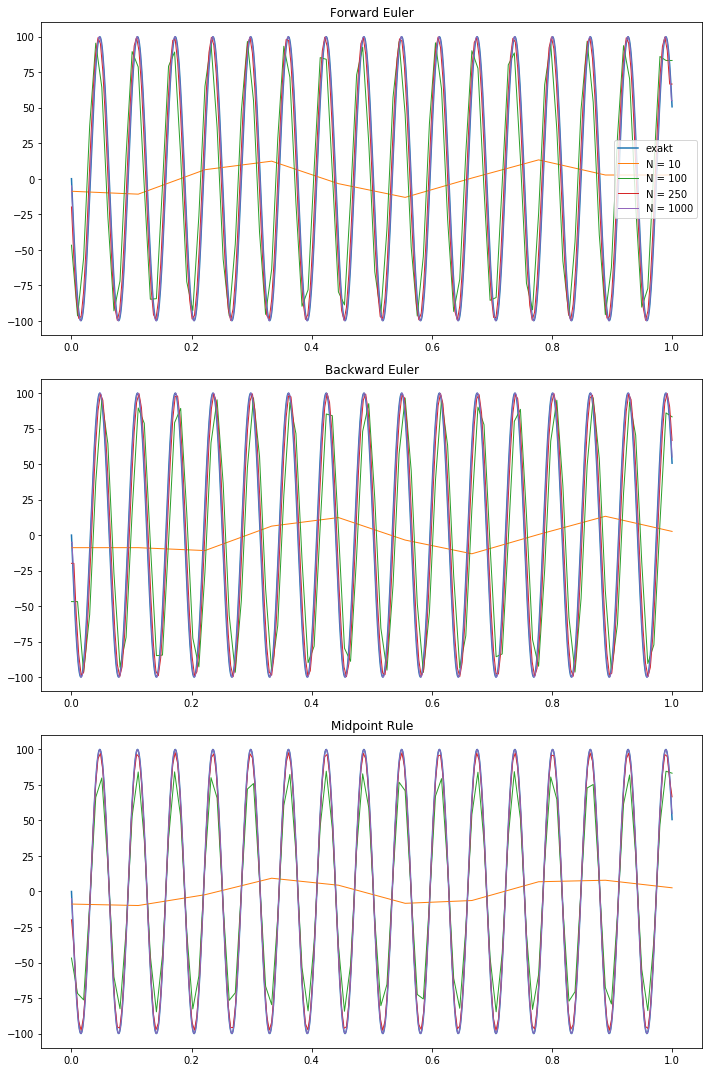

In [53]:
N_list = [10,100,250,1000]

my_func = f1
my_dfunc = df1

fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 15))

# Exakt plotten
X = np.linspace(0,1,1000)
df_exakt = my_dfunc(X)  
ax1.plot(X,df_exakt,label='exakt')
ax2.plot(X,df_exakt,label='exakt')
ax3.plot(X,df_exakt,label='exakt')

#Approx plotten für verschiedene Auflösungen
for N in N_list:
    idxes = np.arange(N)
    x0 = 0
    xN = 1
    X = np.linspace(x0, xN, N)
    dx = (xN-x0)/N
    
    F = my_func(X)
    A_fw = (1/dx)*fw_matrix(N)
    A_rw = (1/dx)*rw_matrix(N)
    A_mp = (1/dx)*mp_matrix(N)

    
    dF_fw = A_fw.dot(F)
    dF_rw = A_rw.dot(F)
    dF_mp = A_mp.dot(F)
    
    ax1.set_title("Forward Euler")
    ax1.plot(X,dF_fw,label='N = {}'.format(N),linewidth='1')
    
    ax2.set_title("Backward Euler")
    ax2.plot(X,dF_rw,label='N = {}'.format(N),linewidth='1')
    
    ax3.set_title("Midpoint Rule")
    ax3.plot(X,dF_mp,label='N = {}'.format(N),linewidth='1')

ax1.legend()
plt.tight_layout()
plt.show()

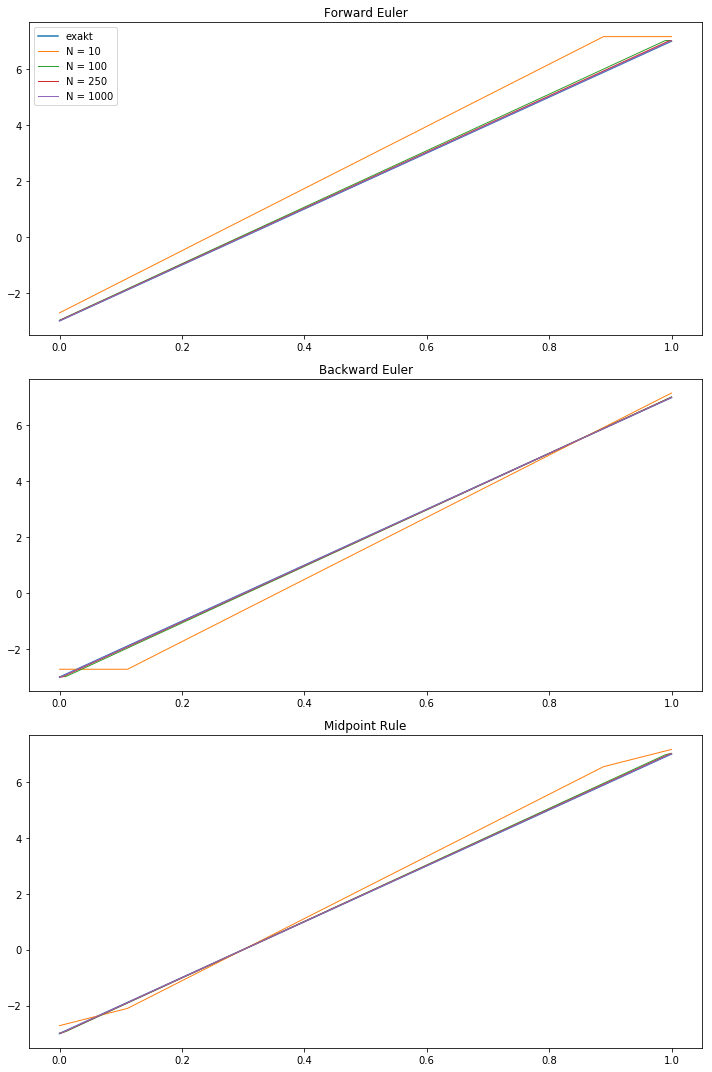

In [54]:
N_list = [10,100,250,1000]

my_func = f2
my_dfunc = df2

fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 15))

# Exakt plotten
X = np.linspace(0,1,1000)
df_exakt = my_dfunc(X)  
ax1.plot(X,df_exakt,label='exakt')
ax2.plot(X,df_exakt,label='exakt')
ax3.plot(X,df_exakt,label='exakt')

#Approx plotten für verschiedene Auflösungen
for N in N_list:
    idxes = np.arange(N)
    x0 = 0
    xN = 1
    X = np.linspace(x0, xN, N)
    dx = (xN-x0)/N
    
    F = my_func(X)
    A_fw = (1/dx)*fw_matrix(N)
    A_rw = (1/dx)*rw_matrix(N)
    A_mp = (1/dx)*mp_matrix(N)
    dF_fw = A_fw.dot(F)
    dF_rw = A_rw.dot(F)
    dF_mp = A_mp.dot(F)
    
    ax1.set_title("Forward Euler")
    ax1.plot(X,dF_fw,label='N = {}'.format(N),linewidth='1')
    
    ax2.set_title("Backward Euler")
    ax2.plot(X,dF_rw,label='N = {}'.format(N),linewidth='1')
    
    ax3.set_title("Midpoint Rule")
    ax3.plot(X,dF_mp,label='N = {}'.format(N),linewidth='1')

ax1.legend()
plt.tight_layout()
plt.show()

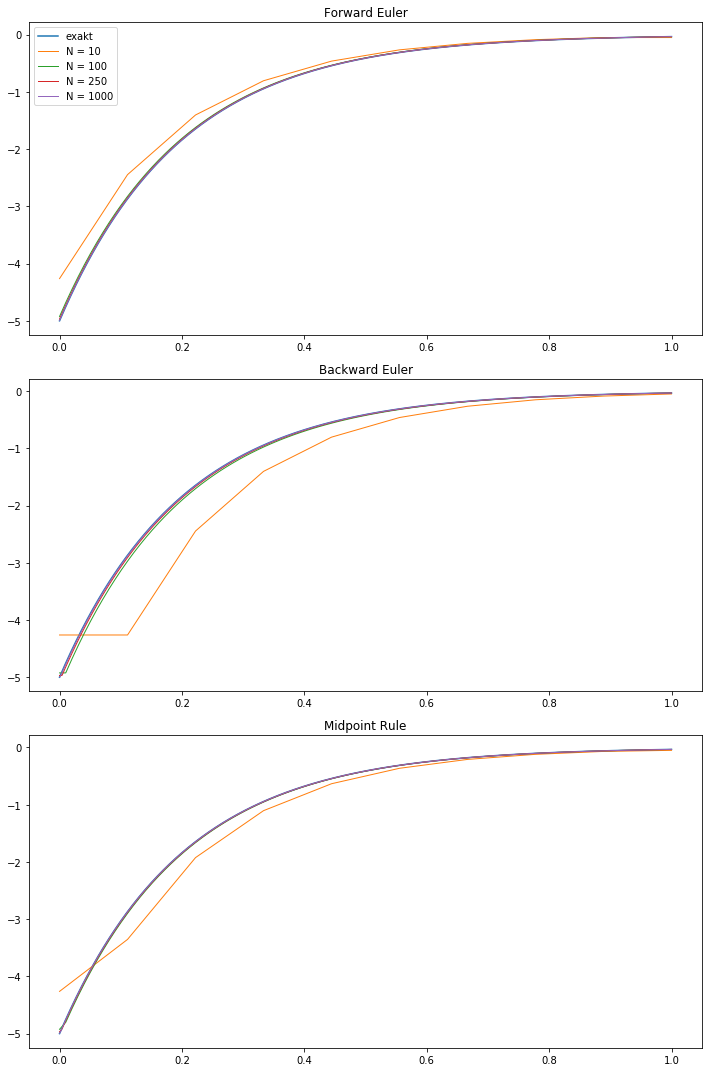

In [55]:
N_list = [10,100,250,1000]

my_func = f3
my_dfunc = df3

fig1, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10, 15))

# Exakt plotten
X = np.linspace(0,1,1000)
df_exakt = my_dfunc(X)  
ax1.plot(X,df_exakt,label='exakt')
ax2.plot(X,df_exakt,label='exakt')
ax3.plot(X,df_exakt,label='exakt')

#Approx plotten für verschiedene Auflösungen
for N in N_list:
    idxes = np.arange(N)
    x0 = 0
    xN = 1
    X = np.linspace(x0, xN, N)
    dx = (xN-x0)/N
    
    F = my_func(X)
    A_fw = (1/dx)*fw_matrix(N)
    A_rw = (1/dx)*rw_matrix(N)
    A_mp = (1/dx)*mp_matrix(N)
    dF_fw = A_fw.dot(F)
    dF_rw = A_rw.dot(F)
    dF_mp = A_mp.dot(F)
    
    ax1.set_title("Forward Euler")
    ax1.plot(X,dF_fw,label='N = {}'.format(N),linewidth='1')
    
    ax2.set_title("Backward Euler")
    ax2.plot(X,dF_rw,label='N = {}'.format(N),linewidth='1')
    
    ax3.set_title("Midpoint Rule")
    ax3.plot(X,dF_mp,label='N = {}'.format(N),linewidth='1')

ax1.legend()
plt.tight_layout()
plt.show()